# Suffix Tree

Simple Suffix Tree Construction and Visualization 

In [37]:
class Node():
    def __init__(self) -> None:
        self.edges: dict[str, Node] = {}


class SuffixTree():
    def __init__(self) -> None:
        self.root = Node()


    def insert(self, suffix: str) -> None:
        i, j = 0, 0
        cur = self.root

        while j < len(suffix):
            # Check if the current substring suffix[i:j+1] matches any prefix of keys in the current node's edges
            while suffix[i:j+1] in [key[:j+1-i] for key in cur.edges.keys()]:
                j += 1

            # If no match is found, create a new edge with the remaining substring suffix[i:] and return
            if i == j:
                cur.edges[suffix[i:]] = Node()
                return
            
            # If a match is found, update the current node to the node the edge suffix[i:j] leads to
            else:
                if suffix[i:j] in cur.edges.keys():
                    cur = cur.edges[suffix[i:j]]
                    i = j
                else:
                    # Find the key that contains the substring suffix[i:j]
                    for key in cur.edges.keys():
                        if suffix[i:j] == key[:j-i]:
                            break

                    # Save the remaining subtree for the matched key
                    subtree = cur.edges[key]
                    del cur.edges[key]

                    # Create a new intermediate node for the matched substring suffix[i:j]
                    cur.edges[suffix[i:j]] = Node()
                    cur = cur.edges[suffix[i:j]]

                    # Attach the remaining subtree and the new suffix to the new node
                    cur.edges[key[j-i:]] = subtree
                    cur.edges[suffix[j:]] = Node()
                    return


    def get_tree_structure(self) -> list[tuple]:
        cur = self.root
        queue, pairs = [], []
        parent_node = 'root'
        id_val = 0

        while True:
            for child in cur.edges:
                queue.append((cur.edges[child], child + str(id_val)))
                pairs.append((parent_node, child  + str(id_val)))
                id_val += 1

            i = 0
            while not queue[i][0].edges and i+1 < len(queue):
                i +=1

            if not queue[i][0].edges:
                break

            queue = queue[i:]
            cur, parent_node = queue.pop(0)
        
        return pairs

In [38]:
word = 'BANANA' + '$'

T = SuffixTree()

suffixes = [word[i:] for i in range(len(word))]
for suffix in suffixes:
    T.insert(suffix)

suffixes

['BANANA$', 'ANANA$', 'NANA$', 'ANA$', 'NA$', 'A$', '$']

/var/folders/59/bjsmfvdj1rg60mjgvhghyz8c0000gn/T/ipykernel_39508/3380481468.py:8: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = nx.drawing.nx_pydot.graphviz_layout(G, prog="dot")


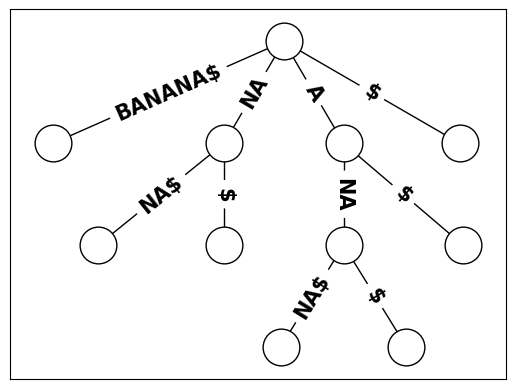

In [39]:
import networkx as nx
import matplotlib.pyplot as plt

pairs = T.get_tree_structure()
G = nx.Graph()
G.add_edges_from(pairs)

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog="dot")

# Remove numbers from labels
def remove_numbers(label):
    return ''.join([i for i in label if not i.isdigit()])

# Create edge labels dictionary
edge_labels = {(u, v): remove_numbers(v) for u, v in pairs}

nx.draw_networkx_nodes(G, pos, node_size=700, node_color='white', edgecolors='black')
nx.draw_networkx_edges(G, pos, edge_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=15, font_weight='bold')

plt.show()